In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM, Dense, Dropout, TimeDistributed, Conv1D,Conv2D, MaxPooling1D, Flatten, Bidirectional, Input, Flatten, Activation, Reshape, RepeatVector, Concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import r2_score
from tensorflow import keras

In [12]:
df1 = pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/Scaled_and_unidemensiolized_datasets\wave2.tab',sep='\t',low_memory=False)
df2 = pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/Scaled_and_unidemensiolized_datasets\wave4.tab',sep='\t',low_memory=False)
df3 = pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/Scaled_and_unidemensiolized_datasets\wave6.tab',sep='\t',low_memory=False)
df4 = pd.read_csv (r'C:\Users\Manos\OneDrive/Thesis Final/LSTM/Scaled_and_unidemensiolized_datasets\wave8.tab',sep='\t',low_memory=False)

In [13]:
Dict= {1:df1,
       2:df2,
       3:df3,
       4:df4
       }

In [14]:
masterlist=[]
for i in range (0,Dict[1].shape[0]):
    featurelist=[]
    for k in range (1,len(Dict)+1):
        featurelist.append(Dict[k].iloc[i].squeeze())
    featurearr=np.array(featurelist) # convert list to np.array
    masterlist.append(featurearr)#add array of seiries to masterlist
Dataset=np.array(masterlist)

In [15]:
n_steps=3
X=Dataset[:,:n_steps,:] 
y=Dataset[:,n_steps,:] 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=32)

Remove ids


In [17]:
X_trainIDs=X_train[:,:,0]
y_trainIDs=y_train[:,0]
X_testIDs=X_test[:,:,0]
y_testIDs=y_test[:,0]

In [18]:
X_train=X_train[:,:,1:]
X_test=X_test[:,:,1:]
y_train=y_train[:,1:]
y_test=y_test[:,1:]

In [20]:
# opt = SGD(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.00005)

In [46]:
model= Sequential()
model.add(Conv1D(filters=24, kernel_size=2, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(X_train.shape[2], activation='linear'))
model.compile(loss = "mse", optimizer = opt , metrics=['mae'])


In [47]:
history=model.fit(X_train, y_train, epochs=50,validation_split=0.05)

Epoch 1/50
63/63 [==============================] - 0s 3ms/step - loss: 0.1105 - mae: 0.2363 - val_loss: 0.0669 - val_mae: 0.1754
Epoch 2/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0543 - mae: 0.1650 - val_loss: 0.0387 - val_mae: 0.1282
Epoch 3/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0358 - mae: 0.1348 - val_loss: 0.0271 - val_mae: 0.1036
Epoch 4/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0278 - mae: 0.1184 - val_loss: 0.0216 - val_mae: 0.0894
Epoch 5/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0233 - mae: 0.1076 - val_loss: 0.0188 - val_mae: 0.0806
Epoch 6/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0211 - mae: 0.1017 - val_loss: 0.0172 - val_mae: 0.0750
Epoch 7/50
63/63 [==============================] - 0s 1ms/step - loss: 0.0196 - mae: 0.0967 - val_loss: 0.0163 - val_mae: 0.0713
Epoch 8/50
63/63 [==============================] - 0s 2ms/step - loss: 0.0185 - mae: 0.09

<function matplotlib.pyplot.show(close=None, block=None)>

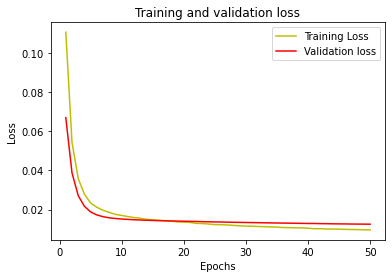

In [48]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs= range(1,len(loss)+1)
plt.plot(epochs, loss, 'y',label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Loss_for_wave8_output.png')
plt.show

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
adjr2=1-(((1-r2)*(len(y)-1))/((len(y)-X.shape[1]-1)))
print('MSE: %.3f' % mse)
print('MAE: %.3f' % mae)
print('MAPE: %.3f' % mape)
print('r2: %.3f' % r2)
print('adjr2: %.3f' % adjr2)

MSE: 0.008
MAE: 0.047
MAPE: 807357743585.074
r2: -0.180
adjr2: -0.182
